## Dataset Prep

In [2]:
import pandas as pd
import numpy as np
import os
import sys
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Audio
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
Ravdess = "/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/"
Crema = "/kaggle/input/cremad/AudioWAV/"
Tess = "/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/"
Savee = "/kaggle/input/surrey-audiovisual-expressed-emotion-savee/ALL/"

In [4]:
ravdess_list = os.listdir(Ravdess)

files = []
emotions = []

for item in ravdess_list:
    actor = os.listdir(Ravdess + item)
    for file in actor:
        name = file.split('.')[0]
        parts = name.split('-')
        emotions.append(int(parts[2]))
        files.append(Ravdess + item + '/' + file)
        
emotion_data = pd.DataFrame(emotions, columns=['Emotions'])
files_data = pd.DataFrame(files, columns=['Files'])

ravdess_df = pd.concat([emotion_data, files_data], axis=1)

ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)

ravdess_df

,Emotions,Files
0,surprise,/kaggle/input/ravdess-emotional-speech-audio/a...
1,neutral,/kaggle/input/ravdess-emotional-speech-audio/a...
2,disgust,/kaggle/input/ravdess-emotional-speech-audio/a...
3,disgust,/kaggle/input/ravdess-emotional-speech-audio/a...
4,neutral,/kaggle/input/ravdess-emotional-speech-audio/a...
...,...,...
1435,fear,/kaggle/input/ravdess-emotional-speech-audio/a...
1436,angry,/kaggle/input/ravdess-emotional-speech-audio/a...
1437,sad,/kaggle/input/ravdess-emotional-speech-audio/a...
1438,disgust,/kaggle/input/ravdess-emotional-speech-audio/a...


In [5]:
crema = os.listdir(Crema)
emotions = []
files = []

for item in crema:
    files.append(Crema + item)
    
    parts = item.split('_')
    if parts[2] == 'SAD':
        emotions.append('sad')
    elif parts[2] == 'ANG':
        emotions.append('angry')
    elif parts[2] == 'DIS':
        emotions.append('disgust')
    elif parts[2] == 'FEA':
        emotions.append('fear')
    elif parts[2] == 'HAP':
        emotions.append('happy')
    elif parts[2] == 'NEU':
        emotions.append('neutral')
    else :
        emotions.append('unknown')
        
emotions_data = pd.DataFrame(emotions, columns=['Emotions'])
files_data = pd.DataFrame(files, columns=['Files'])

crema_df = pd.concat([emotions_data, files_data], axis=1)

crema_df

,Emotions,Files
0,disgust,/kaggle/input/cremad/AudioWAV/1028_TSI_DIS_XX.wav
1,happy,/kaggle/input/cremad/AudioWAV/1075_IEO_HAP_LO.wav
2,happy,/kaggle/input/cremad/AudioWAV/1084_ITS_HAP_XX.wav
3,disgust,/kaggle/input/cremad/AudioWAV/1067_IWW_DIS_XX.wav
4,disgust,/kaggle/input/cremad/AudioWAV/1066_TIE_DIS_XX.wav
...,...,...
7437,angry,/kaggle/input/cremad/AudioWAV/1060_IEO_ANG_MD.wav
7438,angry,/kaggle/input/cremad/AudioWAV/1088_IWL_ANG_XX.wav
7439,angry,/kaggle/input/cremad/AudioWAV/1050_IOM_ANG_XX.wav
7440,sad,/kaggle/input/cremad/AudioWAV/1044_IWL_SAD_XX.wav


In [6]:
tess = os.listdir(Tess)

emotions = []
files = []

for item in tess:
    items = os.listdir(Tess + item)
    for file in items:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part == 'ps':
            emotions.append('surprise')
        else:
            emotions.append(part)
        files.append(Tess + item + '/' + file)
        
tess_df = pd.concat([pd.DataFrame(emotions, columns=['Emotions']), pd.DataFrame(files, columns=['Files'])], axis=1)

tess_df

,Emotions,Files
0,fear,/kaggle/input/toronto-emotional-speech-set-tes...
1,fear,/kaggle/input/toronto-emotional-speech-set-tes...
2,fear,/kaggle/input/toronto-emotional-speech-set-tes...
3,fear,/kaggle/input/toronto-emotional-speech-set-tes...
4,fear,/kaggle/input/toronto-emotional-speech-set-tes...
...,...,...
2795,surprise,/kaggle/input/toronto-emotional-speech-set-tes...
2796,surprise,/kaggle/input/toronto-emotional-speech-set-tes...
2797,surprise,/kaggle/input/toronto-emotional-speech-set-tes...
2798,surprise,/kaggle/input/toronto-emotional-speech-set-tes...


In [7]:
savee = os.listdir(Savee)

emotions = []
files = []

for item in savee:
    files.append(Savee + item)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele == 'a':
        emotions.append('angry')
    elif ele == 'd':
        emotions.append('disgust')
    elif ele == 'f':
        emotions.append('fear')
    elif ele == 'h':
        emotions.append('happy')
    elif ele == 'n':
        emotions.append('neutral')
    elif ele == 'sa':
        emotions.append('sad')
    else:
        emotions.append('surprise')
        
savee_df = pd.concat([pd.DataFrame(emotions, columns=['Emotions']), pd.DataFrame(files, columns=['Files'])], axis=1)
savee_df

,Emotions,Files
0,surprise,/kaggle/input/surrey-audiovisual-expressed-emo...
1,surprise,/kaggle/input/surrey-audiovisual-expressed-emo...
2,surprise,/kaggle/input/surrey-audiovisual-expressed-emo...
3,surprise,/kaggle/input/surrey-audiovisual-expressed-emo...
4,surprise,/kaggle/input/surrey-audiovisual-expressed-emo...
...,...,...
475,surprise,/kaggle/input/surrey-audiovisual-expressed-emo...
476,surprise,/kaggle/input/surrey-audiovisual-expressed-emo...
477,surprise,/kaggle/input/surrey-audiovisual-expressed-emo...
478,surprise,/kaggle/input/surrey-audiovisual-expressed-emo...


In [8]:
df = pd.concat([ravdess_df, crema_df, tess_df, savee_df], axis = 0)
df.to_csv("df.csv",index=False)
df

,Emotions,Files
0,surprise,/kaggle/input/ravdess-emotional-speech-audio/a...
1,neutral,/kaggle/input/ravdess-emotional-speech-audio/a...
2,disgust,/kaggle/input/ravdess-emotional-speech-audio/a...
3,disgust,/kaggle/input/ravdess-emotional-speech-audio/a...
4,neutral,/kaggle/input/ravdess-emotional-speech-audio/a...
...,...,...
475,surprise,/kaggle/input/surrey-audiovisual-expressed-emo...
476,surprise,/kaggle/input/surrey-audiovisual-expressed-emo...
477,surprise,/kaggle/input/surrey-audiovisual-expressed-emo...
478,surprise,/kaggle/input/surrey-audiovisual-expressed-emo...


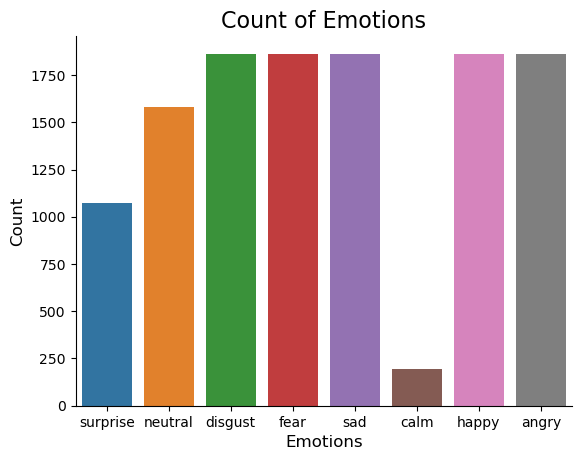

In [9]:
plt.title('Count of Emotions', size=16)
sns.countplot(x=df['Emotions'])
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [10]:
def create_waveplot(data, sr, emotion):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for {} emotion'.format(emotion), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

In [11]:
def create_spectrogram(data, sr, emotion):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for {} emotion'.format(emotion), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')  
    plt.colorbar()

In [12]:
def create_wave_spect(emotion):
    path = np.array(df.Files[df.Emotions==emotion])[0]
    data, sampling_rate = librosa.load(path)
    create_waveplot(data, sampling_rate, emotion)
    create_spectrogram(data, sampling_rate, emotion)
    return str(path)

## Viewing certain audio spectograms

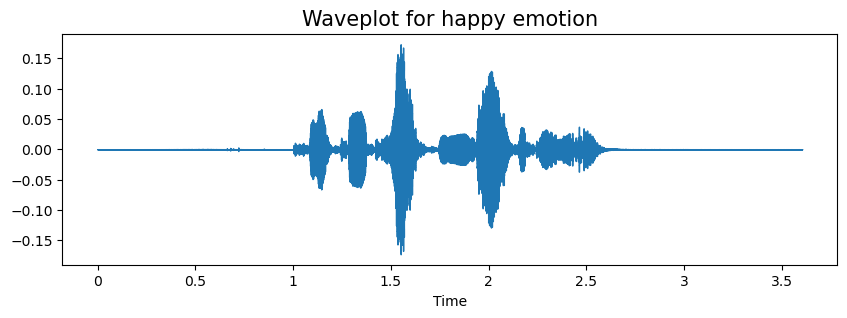

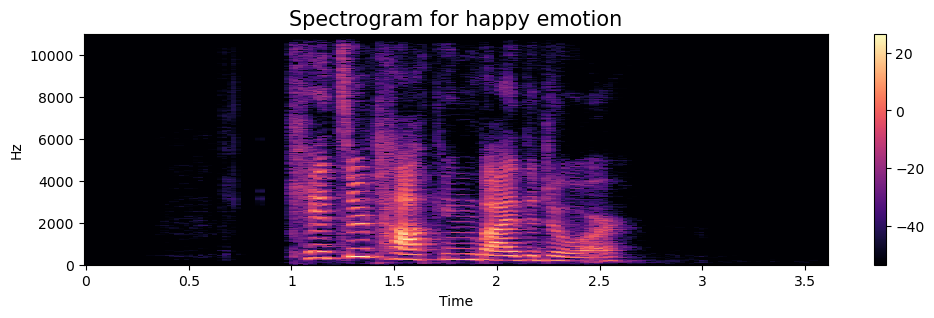

In [13]:
Audio(create_wave_spect('happy'))

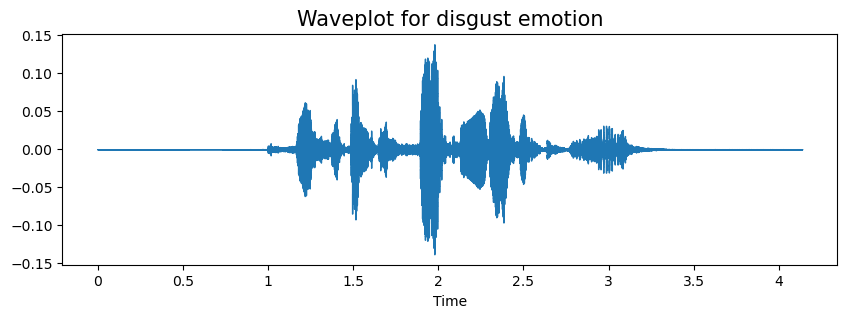

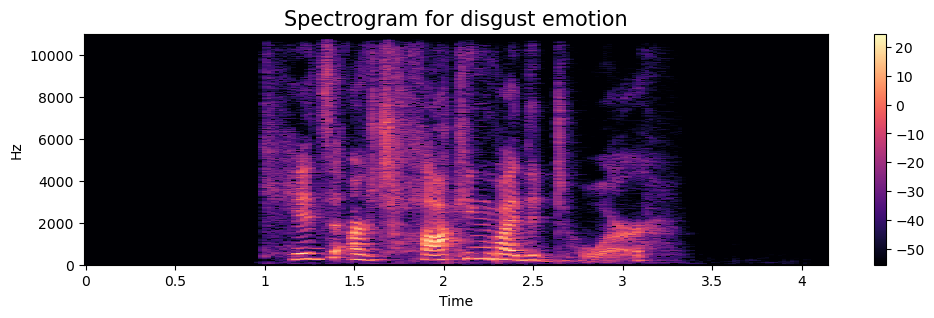

In [14]:
Audio(create_wave_spect('disgust'))

## Data Augmentation

## Feature Extraction

 ## Data Prep

In [ ]:
# Splitting into training and validation parts, encoding and scaling

## Model

In [3]:
model = Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

NameError: name 'x_train' is not defined